In [1]:
# Set up parameters to create data for estimation testing
seed <- 23
mu1 <- 0
mu2 <- 9
sd1 <- 1
sd2 <- 1
pi <- 0.7
params <- paste(seed,mu1,mu2,sd1,sd2,pi)

In [4]:
# Results from the EM algorithm
em_call <- paste("python callableEM.py",params)
emResults <- shell(em_call,intern=TRUE)
results <- emResults[1:(length(emResults))]
estMu1EM <- as.numeric(results[1])
estPi1EM <- as.numeric(results[2])
estSd1EM <- as.numeric(results[3])
estMu2EM <- as.numeric(results[4])
estPi2EM <- as.numeric(results[5])
estSd1EM <- as.numeric(results[6])
results

[1] "-0.0597090382166"   "0.699999997242"     "0.9598639732150809"
[4] "8.93523083451"      "0.300000002758"     "0.9662710986143117"

In [8]:
# Resuls from the PSO algorithm
pso_call <- paste("python callablePSO.py",params)
psoResults <- shell(pso_call,intern=TRUE)
results <- psoResults[1:(length(psoResults))]
estMu1PSO <- as.numeric(results[1])
estPi1PSO <- as.numeric(results[2])
estSd1PSO <- as.numeric(results[3])
estMu2PSO <- as.numeric(results[4])
estPi2PSO <- as.numeric(results[5])
estSd1PSO <- as.numeric(results[6])
results

[1] "0.654534062566" "0.565784107168" "1"              "10.05780759"   
[5] "0.434215892832" "1"

In [23]:
# Monte Carlo simulation
M <- 20

truMu1 <- numeric(M)
truPi1 <- numeric(M)
truSd1 <- numeric(M)
truMu2 <- numeric(M)
truPi2 <- numeric(M)
truSd2 <- numeric(M)

estMu1EM <- numeric(M)
estPi1EM <- numeric(M)
estSd1EM <- numeric(M)
estMu2EM <- numeric(M)
estPi2EM <- numeric(M)
estSd2EM <- numeric(M)

estMu1PSO <- numeric(M)
estPi1PSO <- numeric(M)
estSd1PSO <- numeric(M)
estMu2PSO <- numeric(M)
estPi2PSO <- numeric(M)
estSd2PSO <- numeric(M)

for(i in seq(1,M) ) {
    seed <- round(runif(n=1,min=1,max=100))
    mu1 <- round(runif(n=1,min=0,max=10),digits=2)
    mu2 <- round(runif(n=1,min=11,max=20),digits=2)
    sd1 <- round(runif(n=1,min=1,max=3),digits=2)
    sd2 <- sd1
    pi <- round(runif(n=1,min=0.61,max=0.89),digits=2)
    params <- paste(seed,mu1,mu2,sd1,sd2,pi)
   
    truMu1[i] <- mu1
    truMu2[i] <- mu2
    truPi1[i] <- pi 
    truPi2[i] <- 1 - pi
    truSd1[i] <- sd1
    truSd2[i] <- sd2

    em_call <- paste("python randomEM.py",params)
    emResults <- shell(em_call,intern=TRUE)
    results <- emResults[1:(length(emResults))]
    estMu1EM[i] <- as.numeric(results[1])
    estPi1EM[i] <- as.numeric(results[2])
    estSd1EM[i] <- as.numeric(results[3])
    estMu2EM[i] <- as.numeric(results[4])
    estPi2EM[i] <- as.numeric(results[5])
    estSd2EM[i] <- as.numeric(results[6])

    pso_call <- paste("python randomPSO.py",params)
    psoResults <- shell(pso_call,intern=TRUE)
    results <- psoResults[1:(length(psoResults))]
    estMu1PSO[i] <- as.numeric(results[1])
    estPi1PSO[i] <- as.numeric(results[2])
    estSd1PSO[i] <- as.numeric(results[3])
    estMu2PSO[i] <- as.numeric(results[4])
    estPi2PSO[i] <- as.numeric(results[5])
    estSd2PSO[i] <- as.numeric(results[6])
}

In [24]:
print("True Means")
truMu1
truMu2

print("True Pi")
truPi1
truPi2

print("EM Means")
estMu1EM
estMu2EM
print("EM pi")
estPi1EM
estPi2EM
print("PSO Means")
estMu1PSO
estMu2PSO
print("PSO pi")
estPi1PSO
estPi2PSO



[1] "True Means"


[1] 1.07 4.61 3.21 1.87 9.49 2.31 4.17 8.72 7.82 5.40 8.05 5.13 1.72 8.88 5.73
[16] 3.01 4.81 8.66 5.83 5.70

[1] 17.27 12.14 17.88 15.58 15.55 14.86 17.94 11.31 11.78 18.67 11.57 14.20
[13] 18.68 14.65 15.42 13.00 17.57 12.35 13.95 14.82

[1] "True Pi"


[1] 0.87 0.71 0.71 0.87 0.66 0.70 0.62 0.65 0.68 0.82 0.65 0.72 0.88 0.86 0.83
[16] 0.72 0.73 0.75 0.74 0.66

[1] 0.13 0.29 0.29 0.13 0.34 0.30 0.38 0.35 0.32 0.18 0.35 0.28 0.12 0.14 0.17
[16] 0.28 0.27 0.25 0.26 0.34

[1] "EM Means"


[1] 0.932925 4.500288 3.079376 1.923758 9.499451 1.942328 4.391643 9.754814
 [9] 7.831084 5.633339 8.006053 5.223049 1.828038 9.059904 5.669274 3.287479
[17] 4.872614 8.559090 5.818096 5.974819

[1] 17.19420 12.21714 17.80398 15.86401 15.54379 14.35013 18.04161 17.21123
 [9] 12.17617 18.33642 11.89948 14.21070 18.60027 14.56590 15.35516 12.82879
[17] 17.45544 12.34053 14.54001 14.32138

[1] "EM pi"


[1] 0.8700010 0.7006656 0.7100000 0.8699999 0.6598908 0.6993717 0.6200000
 [8] 0.9850576 0.7210454 0.8197753 0.6781930 0.7199995 0.8800000 0.8371526
[15] 0.8299986 0.7078342 0.7301552 0.7429449 0.7342747 0.6476410

[1] 0.12999898 0.29933437 0.29000000 0.13000011 0.34010917 0.30062834
 [7] 0.38000001 0.01494236 0.27895460 0.18022472 0.32180704 0.28000048
[13] 0.12000000 0.16284736 0.17000140 0.29216583 0.26984478 0.25705505
[19] 0.26572528 0.35235897

[1] "PSO Means"


[1]  0.3201782  5.3018037 17.4655335  2.1965379 10.3190946  3.8065173
 [7]  5.1159980  9.2103818  8.6032901  6.6199530  7.9048625  5.7104019
[13]  1.8913488  8.6743035  5.8251979  4.5638469  4.7355455  9.0081542
[19]  7.4099704  6.3972688

[1] 19.623454 12.861684  3.245052 19.190091 16.063499 14.645292 19.477320
 [8] 11.776144 14.170331 18.524488 11.720819 14.900938 19.435499 11.153491
[15] 15.594509 13.352243 18.995740 13.788225 15.828599 15.217254

[1] "PSO pi"


[1] 0.9493006 0.7037508 0.7044114 0.9493006 0.7037508 0.7037508 0.5657841
 [8] 0.8970925 0.8130914 0.7037508 0.7665413 0.5657841 0.9493006 0.5863839
[15] 0.5657841 0.7037508 0.5657841 0.7037508 0.7037508 0.7037508

[1] 0.05069941 0.29624916 0.29558865 0.05069941 0.29624916 0.29624916
 [7] 0.43421589 0.10290750 0.18690859 0.29624916 0.23345870 0.43421589
[13] 0.05069941 0.41361609 0.43421589 0.29624916 0.43421589 0.29624916
[19] 0.29624916 0.29624916

In [72]:
truSd1
truSd2

[1] 1.70 1.91 2.60 2.44 2.40

[1] 1.70 1.91 2.60 2.44 2.40

In [25]:
print("EM")
mean(abs(truMu1 - estMu1EM))
mean(abs(truPi1 - estPi1EM))
# mean(abs(truSd1 - estSd1EM))
mean(abs(truMu2 - estMu2EM))
mean(abs(truPi2 - estPi2EM))
# mean(abs(truSd2 - estSd2EM))

print("PSO")
mean(abs(truMu1 - estMu1PSO ))
mean(abs(truPi1 - estPi1PSO ))
# mean(abs(truSd1 - estSd1PSO ))
mean(abs(truMu2 - estMu2PSO ))
mean(abs(truPi2 - estPi2PSO ))
# mean(abs(truSd2 - estSd2PSO ))

[1] "EM"


[1] 0.1761281

[1] 0.02374517

[1] 0.4857192

[1] 0.02374517

[1] "PSO"


[1] 1.36202

[1] 0.09765968

[1] 1.867901

[1] 0.09765968

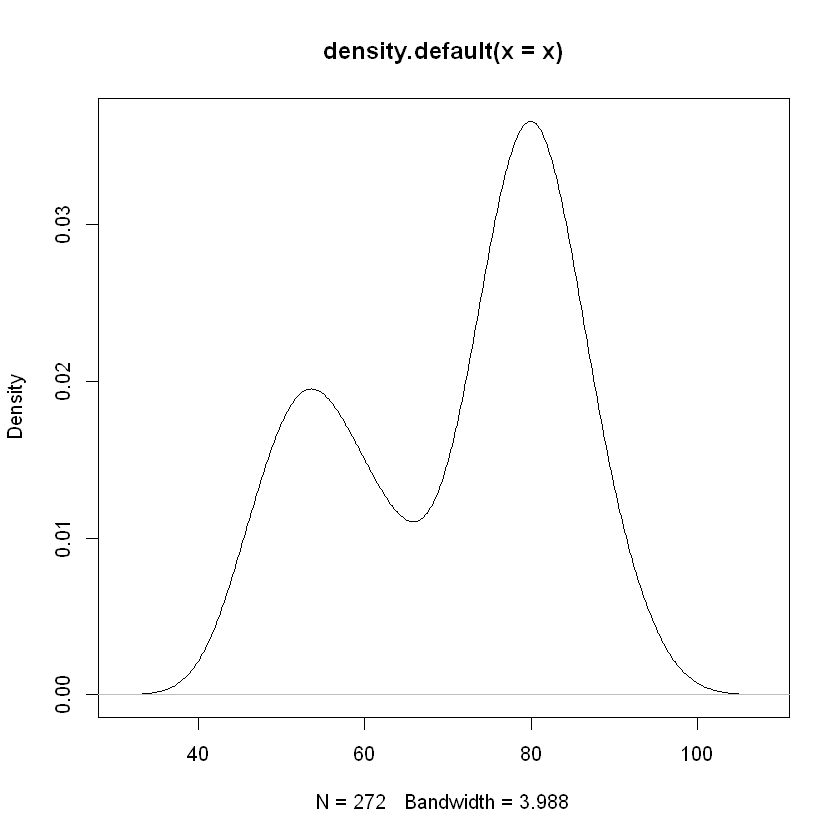

In [3]:
x <- faithful[,2]
write.csv(x, "waittime.csv", row.names = FALSE)
d = density(x)
plot(d)

In [91]:
sum(t < 65) / 272

[1] 0.3455882

In [4]:

rmixture <- function(n,mu1, mu2, sd1, sd2, pi) {
    u <- runif(n)
    r <- numeric(n)
    
    for(i in seq(1,n)) {
        if(u[i] <= pi) {
            r[i] = rnorm(1, mean = mu1, sd = sd1)
        } else {
            r[i] = rnorm(1, mean = mu2, sd = sd2)
        }
    }

    return(r)
}






[1] "54.6148561406"     "0.36088607379"     "5.871219412224483"
[4] "80.0910694027"     "0.63911392621"     "5.867734423707705"

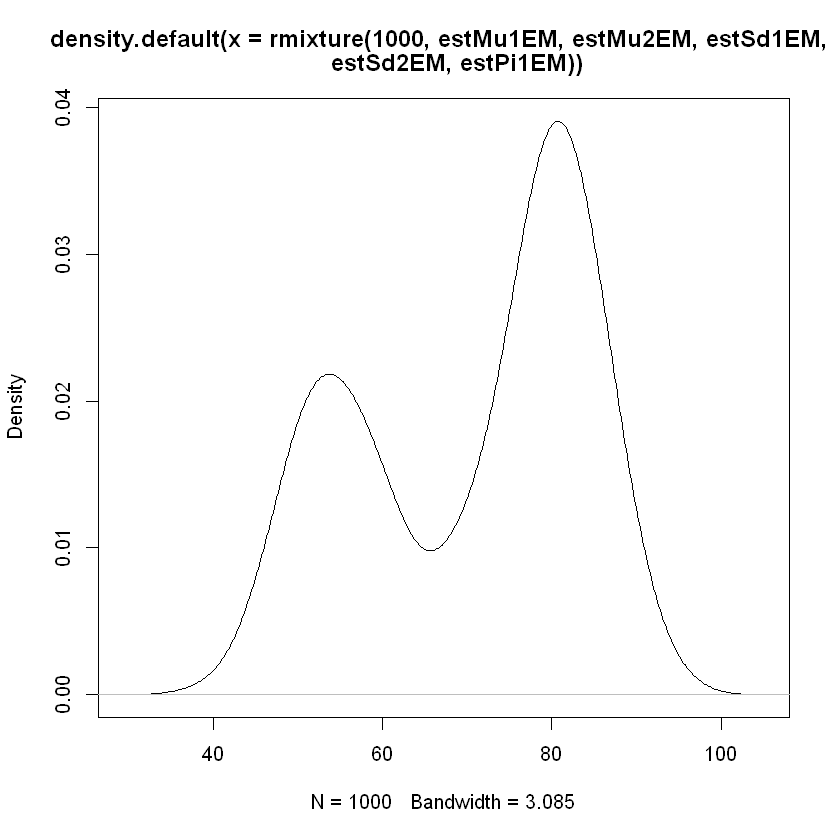

In [10]:
seed <- 23
mu1 <- 0
mu2 <- 0
sd1 <- 1
sd2 <- 1
pi <- 0.7
params <- paste(seed,mu1,mu2,sd1,sd2,pi)

em_call <- paste("python faithfulEM.py",params)
emResults <- shell(em_call,intern=TRUE)
results <- emResults[1:(length(emResults))]
estMu1EM <- as.numeric(results[1])
estPi1EM <- as.numeric(results[2])
estSd1EM <- as.numeric(results[3])
estMu2EM <- as.numeric(results[4])
estPi2EM <- as.numeric(results[5])
estSd2EM <- as.numeric(results[6])

d = density(rmixture(1000,estMu1EM,estMu2EM,estSd1EM,estSd2EM,estPi1EM )  )
plot(d)


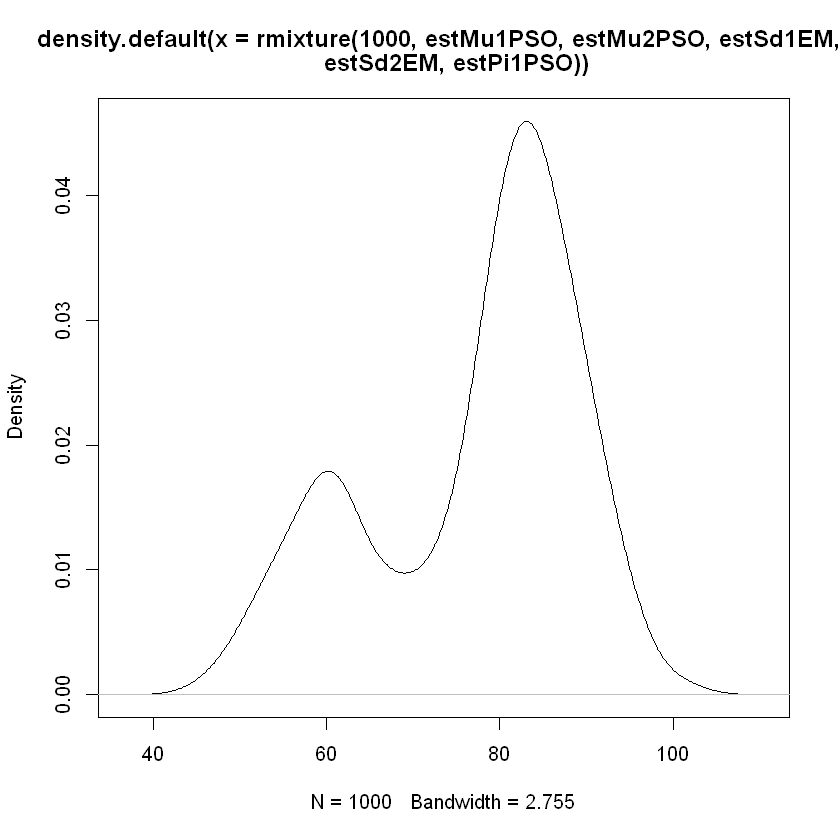

In [12]:
seed <- 23
mu1 <- 0
mu2 <- 0
sd1 <- estSd1EM
sd2 <- estSd2EM
pi <- estPi1EM
params <- paste(seed,mu1,mu2,sd1,sd2,pi)

em_call <- paste("python faithfulPSO.py",params)
emResults <- shell(em_call,intern=TRUE)
results <- emResults[1:(length(emResults))]
estMu1PSO <- as.numeric(results[1])
estPi1PSO <- as.numeric(results[2])
estSd1PSO <- as.numeric(results[3])
estMu2PSO <- as.numeric(results[4])
estPi2PSO <- as.numeric(results[5])
estSd2PSO <- as.numeric(results[6])

d = density(rmixture(1000,estMu1PSO,estMu2PSO,estSd1EM,estSd2EM,estPi1PSO )  )
plot(d)

In [ ]:
estMu1EM
estMu1PSO

estMu2EM
estMu2PSO